# Naive Bayes 

In [20]:
import collections
import pandas as pd
import string
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import operator
from matplotlib.pyplot import figure

## Análise da base de dados

In [21]:
def tokenize(text):
    text    = text.lower()
    text    = text.split()
    yield text

In [22]:
documentos = pd.read_csv('humor_dataset.csv')
documentos = documentos

In [23]:
x=[]
for i in  documentos['text']:
    text_token = next(tokenize(i))
    x.append(text_token)
documentos['texto_tokenizado'] = x

In [25]:
x=[]
for i in documentos['texto_tokenizado']:
    for j in i:
        x.append(j)
        
palavras_doc = collections.Counter(x)

histograma = sorted(palavras_doc.items(),key=operator.itemgetter(1),reverse=True)
histograma  

[('the', 81972),
 ('a', 75717),
 ('to', 53737),
 ('you', 34521),
 ('of', 32837),
 ('in', 32810),
 ('i', 28618),
 ('and', 27378),
 ('what', 26430),
 ('is', 24458),
 ('for', 20615),
 ('do', 19495),
 ('on', 17363),
 ('my', 15873),
 ('with', 14978),
 ('why', 14731),
 ('it', 13642),
 ('how', 12705),
 ('your', 11610),
 ('are', 10890),
 ('did', 10249),
 ('was', 10216),
 ('that', 9583),
 ('at', 9448),
 ('have', 9284),
 ('about', 9230),
 ('like', 8752),
 ('he', 8634),
 ('call', 8518),
 ('an', 8291),
 ('when', 8279),
 ('they', 7713),
 ('his', 7593),
 ('be', 7584),
 ('because', 7320),
 ('from', 7241),
 ('this', 7131),
 ('get', 7103),
 ('just', 6446),
 ('new', 6370),
 ('if', 6219),
 ('trump', 6177),
 ('who', 5977),
 ('not', 5975),
 ('so', 5895),
 ('can', 5732),
 ("it's", 5627),
 ('out', 5559),
 ('but', 5353),
 ("what's", 5335),
 ("don't", 5321),
 ('does', 5297),
 ('one', 5238),
 ('say', 5114),
 ("i'm", 5022),
 ('all', 4897),
 ('up', 4870),
 ('people', 4808),
 ('as', 4691),
 ('me', 4656),
 ('after'

In [26]:
palavras=[]
valores=[]
for i in range(len(histograma)):
    palavras.append(histograma[i][0])
    valores.append(histograma[i][1])

<BarContainer object of 100 artists>

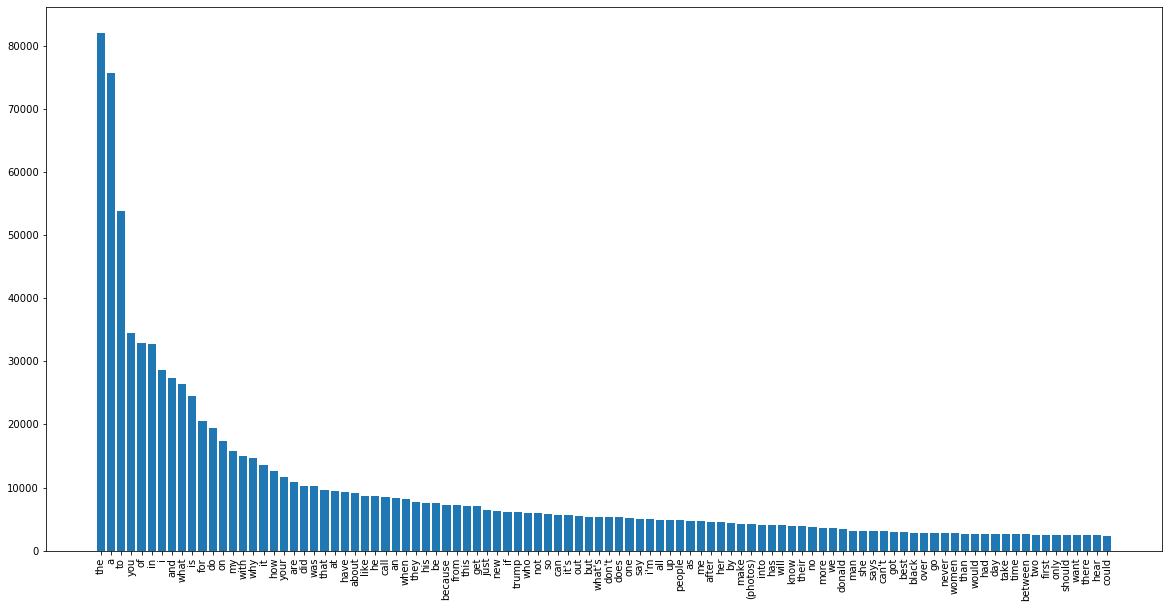

In [32]:
figure(figsize=(20, 10))
plt.xticks(rotation=90)
#fig, ax = plt.subplots()
plt.bar(palavras[0:100],valores[0:100])

## Implementação Simples Naive Bayes

In [33]:
def nv_bayes_train(train_doc, train_class):

    total_docs = train_doc.shape[0]    
    docs_true  = train_doc[train_class==True]
    docs_false = train_doc[train_class==False]

    words_true=[]
    for lista_true in docs_true:
        for word in lista_true:
            words_true.append(word)

    words_false=[]
    for lista_false in docs_false:
        for word in lista_false:
            words_false.append(word)

    vocabulary = list(set(words_true+ words_false))

    dict_word_true = collections.Counter(words_true)
    total_word_true = len(words_true)
    qty_docs_true  = docs_true.shape[0]

    dict_word_false = collections.Counter(words_false)
    total_word_false = len(words_false)
    qty_docs_false = docs_false.shape[0]

    #Log prob priori

    log_priori_true  = np.log(qty_docs_true/total_docs)
    log_priori_false = np.log(qty_docs_false/total_docs)

    #log Likelihood

    log_dict_likelihood_true = {}
    for i in dict_word_true.keys():
        log_dict_likelihood_true[i] =  np.log(dict_word_true[i]/total_word_true)

    log_dict_likelihood_false = {}
    for i in dict_word_false.keys():
        log_dict_likelihood_false[i] =  np.log(dict_word_false[i]/total_word_false)


    return (log_priori_true, log_priori_false,log_dict_likelihood_true,log_dict_likelihood_false, vocabulary)

In [41]:
def nv_bayes_test(test_doc, log_priori_true, log_priori_false, log_likelihood_true, log_likelihood_false, vocabulary):
    x=[]
    for i in test_doc:
        prob_true  = log_priori_true
        prob_false = log_priori_false
        for word in i:
            if word in list(log_likelihood_true.keys()):
                prob_true = prob_true + log_likelihood_true[word]
            if word in list(log_likelihood_false.keys()):
                prob_false = prob_false + log_likelihood_false[word]

        print('true',prob_true)
        print('false',prob_false)
        if prob_true>prob_false:
            x.append(True)
        else:
            x.append(False)
    return x

In [35]:
def confusion_matrix(predict_class, real_class):
    tp=0
    tn=0
    fp=0
    fn=0
    for p,r in zip(predict_class,real_class):
        if   (r == True  & p == True):
            tp = tp + 1
        elif (r == False & p == False):
            tn = tn + 1
        elif (r == False & p == True):
            fp = fp + 1
        else:
            fn = fn +1
    return (tp,tn,fp,fn)

In [36]:
def score (tp,tn,fp,fn):
    precision = tp/(tp+fp)
    recall    = tp/(tp+fn)
    accuracy  = (tp+tn)/(tp+fp+fn+tn)
    return (precision, recall, accuracy)

In [37]:
train_doc, test_doc, train_class, test_class = train_test_split(documentos['texto_tokenizado'], documentos['humor'], test_size=0.20, random_state=42)

In [39]:
log_priori_true, log_priori_false, log_likelihood_true, log_likelihood_false, vocabulary = nv_bayes_train(train_doc, train_class)

In [55]:
def nv_bayes_test(test_doc, log_priori_true, log_priori_false, log_likelihood_true, log_likelihood_false, vocabulary):
    x=[]
    for i in test_doc:
        prob_true  = log_priori_true
        prob_false = log_priori_false
        for word in i:
            if word in list(log_likelihood_true.keys()):
                prob_true = prob_true + log_likelihood_true[word]
            if word in list(log_likelihood_false.keys()):
                prob_false = prob_false + log_likelihood_false[word]

        #print('true',prob_true)
        #print('false',prob_false)
        if prob_true>prob_false:
            x.append(True)
        else:
            x.append(False)
    return x

In [ ]:
predict_class = nv_bayes_test(test_doc, log_priori_true, log_priori_false, log_likelihood_true, log_likelihood_false, vocabulary)

In [ ]:
tp,tn,fp,fn                 = confusion_matrix(predict_class, test_class)
precision, recall, accuracy = score(tp,tn,fp,fn)

In [ ]:
array = [[tp,fp], 
        [fn,tn]]

df_cm = pd.DataFrame(array, index = [i for i in "PN"], columns = [i for i in "PN"])
plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True)
plt.show()

In [ ]:
score1 = score (tp,tn,fp,fn)
print('precision:',score1[0])
print('recall:',score1[1])
print('accuracy:',score1[2])

## Melhoria: remoção de stop words

In [ ]:
stops = set(stopwords.words('english'))

In [ ]:
#Avaliando se as 100 palavras mais frequentes estão nas stop words default
for i in palavras[0:100]:
    if i not in stops:
        print(i)

In [ ]:
def tokenize2(text):
    n_text=[]
    text    = text.lower()
    text    = text.split()
    for i in text:
        if i not in list(stops):
            n_text.append(i)
    return n_text

In [ ]:
documentos = pd.read_csv('humor_dataset.csv')
documentos = documentos

x=[]
for i in  documentos['text']:
    text_token = next(tokenize2(i))
    x.append(text_token)
documentos['texto_tokenizado'] = x

In [ ]:
train_doc, test_doc, train_class, test_class = train_test_split(documentos['texto_tokenizado'], documentos['humor'], test_size=0.20, random_state=42)

log_priori_true, log_priori_false, log_likelihood_true, log_likelihood_false, vocabulary = nv_bayes_train(train_doc, train_class)
predict_class = nv_bayes_test(test_doc, log_priori_true, log_priori_false, log_likelihood_true, log_likelihood_false, vocabulary)

tp,tn,fp,fn                 = confusion_matrix(predict_class, test_class)
precision, recall, accuracy = score(tp,tn,fp,fn)

In [ ]:
array = [[tp,fp], 
        [fn,tn]]

df_cm = pd.DataFrame(array, index = [i for i in "PN"], columns = [i for i in "PN"])
plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True)
plt.show()

In [ ]:
score2 = score (tp,tn,fp,fn)
print('precision:',score2[0])
print('recall:',score2[1])
print('accuracy:',score2[2])

## Análise de ?

In [ ]:
contagem_humor=0
contagem_n_humor=0
for i,j in zip(documentos['text'],documentos['humor']):
    if '?' in i:
        if j==True:
            contagem_humor=contagem_humor+1
        else:
            contagem_n_humor= contagem_n_humor+1